In [1]:
import pandas as pd
import numpy as np
import data_preprocess as dp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = dp.load_data()

data_preprocess.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['product'][df['product'] == p] = product_renames[p]


In [3]:
df.head()

,date,product,rating,review,user,time
0,2016-08-07,sunset-haze,4.0,Love it! Vaped some of this before a dance cla...,CorruptedCupcakez,18:53:38
1,2016-08-04,sunset-haze,4.0,"Tastes like pooh, but the high is nice and ene...",c1n1m1n,04:33:40
2,2015-12-30,sunset-haze,5.0,very intense body high. everything was numb an...,420cakeit,01:06:32
3,2015-12-23,sunset-haze,3.0,I felt like the citrus flavors were overpowere...,Smalls2014,20:52:15
4,2015-12-18,sunset-haze,3.0,This strain made me more analytic and I was ab...,sherrdawgg,18:26:44


In [4]:
date_df = df.groupby('date').count()

In [5]:
date_df_ts = date_df.reset_index()

In [6]:
date_df_ts['rolling_mean_reviews_p=10'] = pd.rolling_mean(date_df_ts.review, window=10)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  if __name__ == '__main__':


In [7]:
date_df_ts.head()

,date,product,rating,review,user,time,rolling_mean_reviews_p=10
0,2010-06-12,1,1,1,1,1,NaN
1,2010-06-14,1,1,1,1,1,NaN
2,2010-06-16,1,1,1,1,1,NaN
3,2010-06-19,1,1,1,1,1,NaN
4,2010-06-22,1,1,1,1,1,NaN


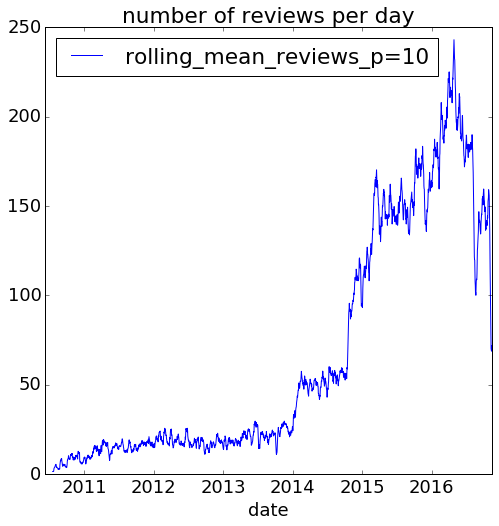

In [8]:
plt.rcParams.update({'font.size': 18})
f = plt.figure(figsize=(8, 8))
ax = plt.gca()
f = date_df_ts.plot(x='date', y='rolling_mean_reviews_p=10', ax=ax)
t = plt.title('number of reviews per day')

In [10]:
df.shape

(152618, 6)

In [16]:
df2 = df.copy()
df2['sum_col'] = 1

In [20]:
user_groups = df2.groupby('user')

In [21]:
user_group_df = user_groups.agg({'sum_col' : np.sum, 'date' : [np.min, np.max]})

In [22]:
user_group_df.head()

date             sum_col
                   amin        amax     sum
user                                       
"Bob"        2014-01-17  2014-01-17       1
$hizzoberry  2010-10-05  2010-10-07       7
--420--      2015-12-16  2016-09-22       3
-Jeremy      2014-10-02  2014-10-02       2
-Mac-        2015-10-19  2015-11-23       3

In [26]:
user_group_df.iloc[0]['date']

amin    2014-01-17
amax    2014-01-17
Name: "Bob", dtype: object

In [31]:
date_user_df = user_group_df['date'].groupby('amin').count()
date_user_df.head()


,amax
amin,
2010-06-12,1
2010-06-14,1
2010-06-16,1
2010-06-22,1
2010-07-12,1


In [36]:
date_user_day_df = date_user_df.reset_index()
date_user_day_df = date_user_day_df.rename(columns={'amin':'date'})
date_user_day_df.head()

,date,amax,rolling_mean_reviews_p=10
0,2010-06-12,1,NaN
1,2010-06-14,1,NaN
2,2010-06-16,1,NaN
3,2010-06-22,1,NaN
4,2010-07-12,1,NaN


In [39]:
date_user_day_df_groups = date_user_day_df.groupby('date').sum()
date_user_day_df_groups.reset_index(inplace=True)
date_user_day_df_groups['rolling_mean_reviews_p=10'] = pd.rolling_mean(date_user_day_df_groups.amax, window=10)
date_user_day_df_groups.head()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  app.launch_new_instance()


,date,amax,rolling_mean_reviews_p=10
0,2010-06-12,1,NaN
1,2010-06-14,1,NaN
2,2010-06-16,1,NaN
3,2010-06-22,1,NaN
4,2010-07-12,1,NaN


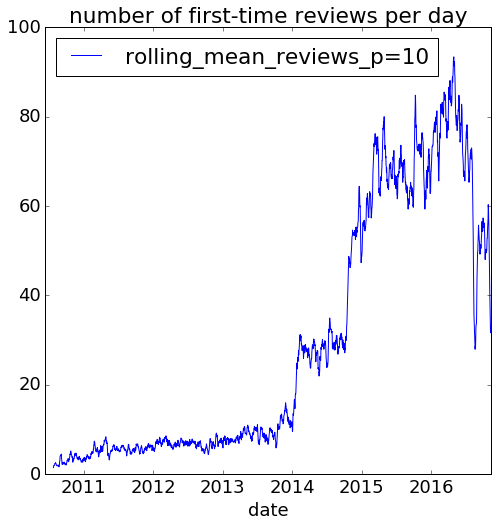

In [41]:
plt.rcParams.update({'font.size': 18})
f = plt.figure(figsize=(8, 8))
ax = plt.gca()
f = date_user_day_df_groups.plot(x='date', y='rolling_mean_reviews_p=10', ax=ax)
t = plt.title('number of first-time reviews per day')

In [59]:
fraction_df1 = pd.DataFrame(date_user_day_df_groups['rolling_mean_reviews_p=10'])
fraction_df1['date'] = date_user_day_df_groups['date']
fraction_df2 = pd.DataFrame(date_df_ts['rolling_mean_reviews_p=10'])
fraction_df2['date'] = date_df_ts['date']
fraction_df = fraction_df1.merge(fraction_df2, on='date')

In [60]:
fraction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 2284
Data columns (total 3 columns):
rolling_mean_reviews_p=10_x    2276 non-null float64
date                           2285 non-null object
rolling_mean_reviews_p=10_y    2277 non-null float64
dtypes: float64(2), object(1)
memory usage: 71.4+ KB


In [61]:
fraction_df.dropna(inplace=True)

In [62]:
fraction_df['date'] = pd.to_datetime(fraction_df['date'])

In [65]:
fraction_df['1st_review_rolling_mean_p=10'] = fraction_df['rolling_mean_reviews_p=10_x'] / \
                                                fraction_df['rolling_mean_reviews_p=10_y']

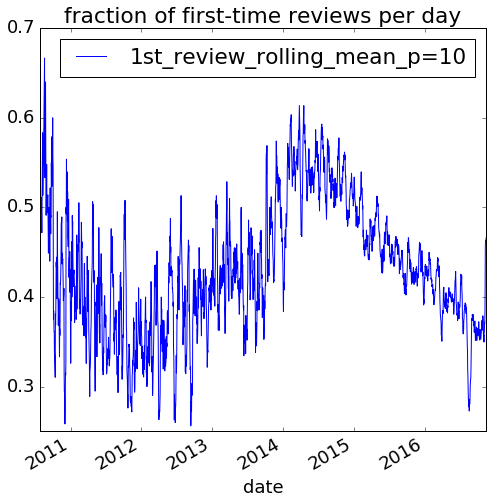

In [67]:
plt.rcParams.update({'font.size': 18})
f = plt.figure(figsize=(8, 8))
ax = plt.gca()
f = fraction_df.plot(x='date', y='1st_review_rolling_mean_p=10', ax=ax)
t = plt.title('fraction of first-time reviews per day')

# let's checkout the reviews over time for some different products

In [68]:
prod_groups = df2.groupby('product')

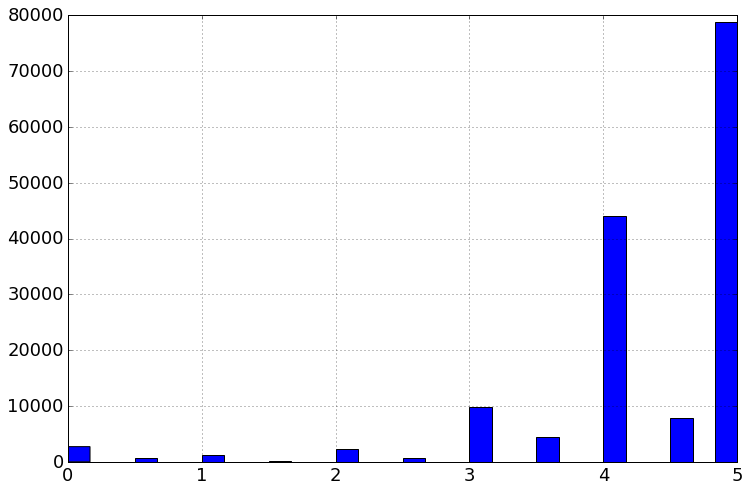

In [9]:
f = plt.figure(figsize=(12, 8))
ax = plt.gca()
f = df.rating.hist(ax=ax, bins=30)

In [20]:
df.rating.mean()

4.3107501147465737

In [21]:
print df.user.unique().shape[0], 'unique users'

65773 unique users


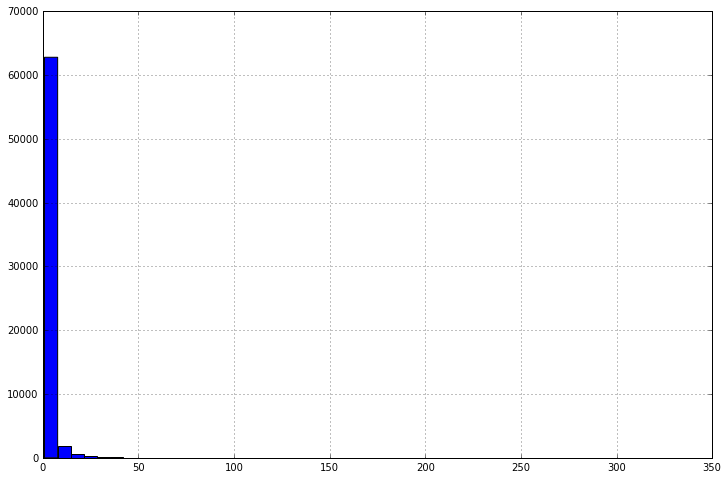

In [22]:
users = df.groupby('user').count()

f = plt.figure(figsize=(12, 8))
ax = plt.gca()
f = users.rating.hist(ax=ax, bins=50)

In [23]:
print 'max number of ratings by a user:', users.rating.max()
print 'for user', users.rating.argmax()

max number of ratings by a user: 345
for user Chill_Panda


# uhhh...need to remove 'anonymous' reviews. Riiiight

## now this is done in the data_preprocess.load_data() function

In [24]:
df_no_anon = df[df['user'] != 'Anonymous']

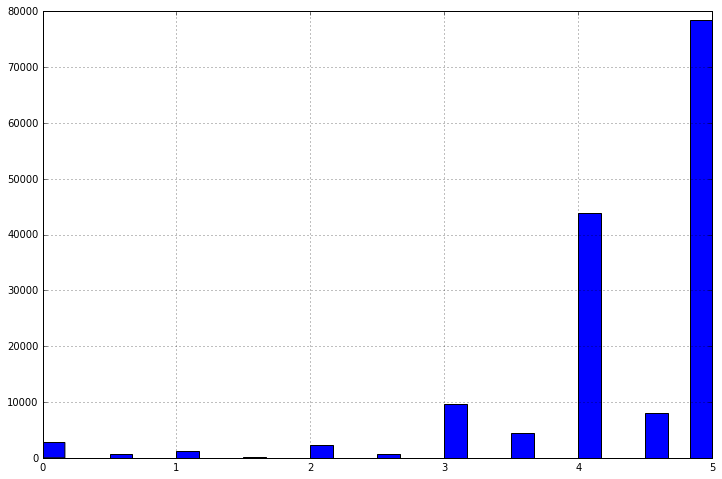

In [25]:
f =plt.figure(figsize=(12, 8))
ax = plt.gca()
f = df_no_anon.rating.hist(ax=ax, bins=30)

In [26]:
df.rating.mean()

4.3107501147465737

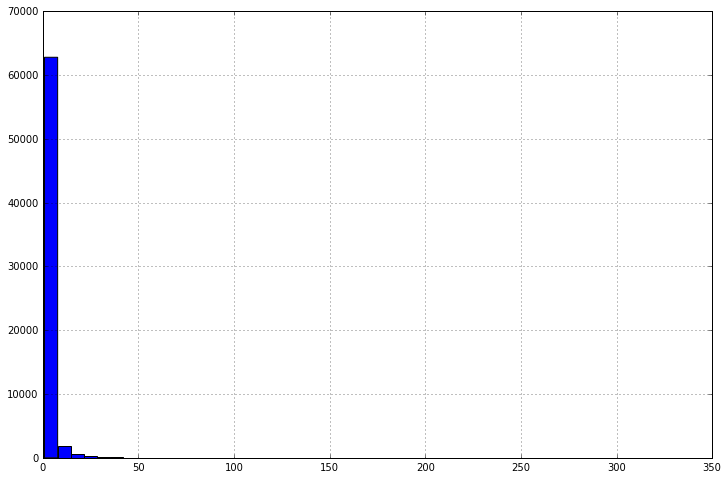

In [27]:
users = df_no_anon.groupby('user').count()

f = plt.figure(figsize=(12, 8))
ax = plt.gca()
f = users.rating.hist(ax=ax, bins=50)

In [28]:
print 'max number of ratings by a user:', users.rating.max()
print 'for user', users.rating.argmax()

max number of ratings by a user: 345
for user Chill_Panda


In [29]:
users.sort_values(by='rating', ascending=False)

,date,product,rating,review,time
user,,,,,
Chill_Panda,345,345,345,345,345
sweetbutter80,266,266,266,266,266
KindGodess420,200,200,200,200,200
emanuel80,197,197,197,197,197
gatorhunts420,180,180,180,180,180
hi2,161,161,161,161,161
demis,157,157,157,157,157
nathanmontgomery,152,152,152,152,152
eb,151,151,151,151,151


In [30]:
most_ratings = users[users['rating'] > 10]

In [31]:
most_ratings.shape

(1776, 5)

In [32]:
# users with fewer than 20 ratings
fewer_ratings = users[users['rating'] < 20]

In [33]:
fewer_ratings.shape[0]

65162

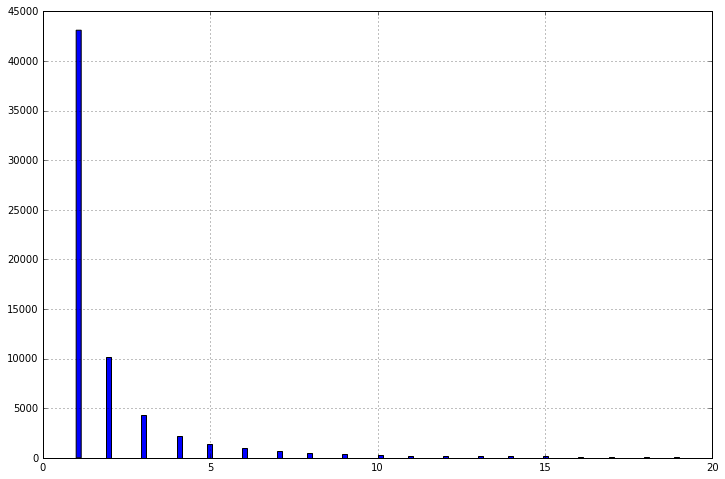

In [37]:
f = plt.figure(figsize=(12, 8))
ax = plt.gca()
f = fewer_ratings.rating.hist(ax=ax, bins=20)

In [38]:
fewer_ratings.rating.mean()

1.9847457106902797

In [39]:
fewer_ratings.rating.mode()[0]

1

In [40]:
df[df['user'] == 'Anonymous'].shape[0]

0

In [41]:
df.shape[0]

152510

In [60]:
# users with more than 1 rating
more_ratings = users[(users['rating'] > 1)]# & (users['rating'] < 30)]

In [61]:
more_ratings.shape[0]

22670

In [62]:
more_ratings = users[(users['rating'] > 1) & (users['rating'] < 30)]

In [63]:
more_ratings.shape

(22379, 5)

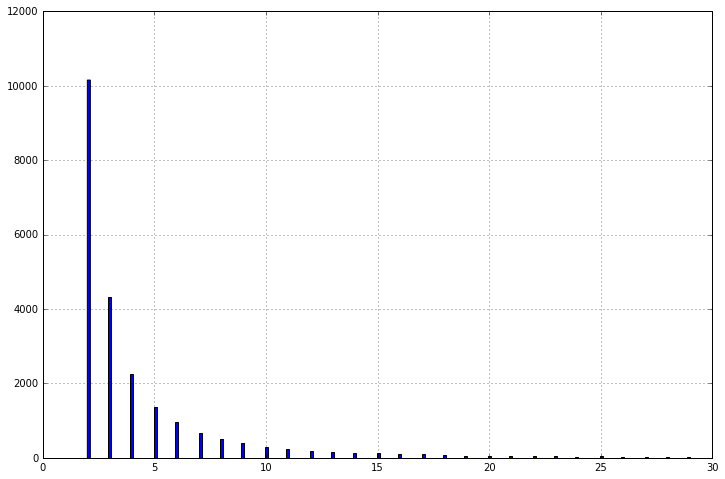

In [65]:
f = plt.figure(figsize=(12, 8))
ax = plt.gca()
f = more_ratings.rating.hist(ax=ax, bins=200)

In [48]:
df.columns

Index([u'date', u'product', u'rating', u'review', u'user', u'time'], dtype='object')

In [49]:
products = df.groupby('product')

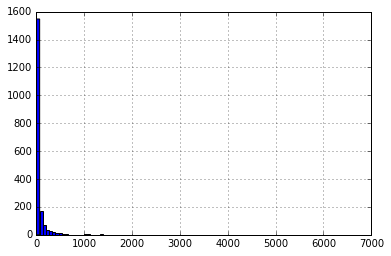

In [50]:
f = products.count()['rating'].hist(bins=100)

In [51]:
products.count()['rating'].mean()

78.532440782698245

In [52]:
products.count()['rating'].argmax()

u'blue-dream'

In [53]:
prod_rev_cnt = products.count()

In [54]:
fewer_reviews = prod_rev_cnt[prod_rev_cnt.rating < 1000]

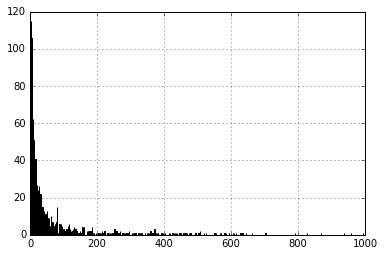

In [55]:
f = fewer_reviews.rating.hist(bins=1000)

In [56]:
df.shape[0]

152510

In [57]:
more_reviews = prod_rev_cnt[(prod_rev_cnt.rating > 3)]

In [58]:
more_reviews.shape

(1641, 5)

In [59]:
prod_rev_cnt.shape

(1942, 5)

# luckily just found out some of the strain names are messed up...encoded or something

In [109]:
df2 = dp.load_data(fix_names=False)
prod_rev_cnt = df2.groupby('product').count()

TypeError: load_data() takes no arguments (1 given)

In [59]:
products = prod_rev_cnt.index

In [68]:
prod_by_len = sorted(products, key=lambda x: len(x), reverse=True)

In [71]:
prod_by_len

[u'edi-pure-savory-roasted-garlic-crackers',
 u'edi-pure-savory-roasted-tomato-crackers',
 u'liquid-gold-vape-pen-super-silver-haze',
 u'golden-xtrx-oil-vaporizer-cartridge-h',
 u'golden-xtrx-oil-vaporizer-cartridge-i',
 u'golden-xtrx-oil-vaporizer-cartridge-s',
 u'golden-xtrx-personal-vaporizer-hybrid',
 u'golden-xtrx-personal-vaporizer-sativa',
 u'0bf3f759-186e-4dad-89d0-e0fc7598ac53',
 u'29aca226-23ba-4726-a4ab-f3bf68f2a3c4',
 u'c42aa00a-595a-4e58-a7af-0f8ab998073a',
 u'liquid-gold-vape-pen-blackberry-kush',
 u'dixie-medicated-chocolate-truffles',
 u'dixie-medicated-crispy-rice-treats',
 u'liquid-gold-vape-pen-pink-lemonade',
 u'dixie-elixirs-sparkling-blueberry',
 u'liquid-gold-vape-pen-green-crack',
 u'liquid-gold-vape-pen-orange-kush',
 u'liquid-gold-vape-pen-purple-haze',
 u'liquid-gold-vape-pen-silver-haze',
 u'liquid-gold-vape-pen-white-widow',
 u'edipure-wild-strawberry-gummies',
 u'liquid-gold-vape-pen-red-diesel',
 u'dixie-medicated-fruit-lozenges',
 u'middlefork-x-pineappl

In [74]:
import scrape_leafly as sl

In [75]:
strains = sl.load_current_strains()

In [79]:
strain_names = np.array([s.split('/')[-1] for s in strains])

In [80]:
mask = strain_names == '0bf3f759-186e-4dad-89d0-e0fc7598ac53'

In [82]:
strains = np.array(strains)

In [83]:
strains[mask] # turns out it's berry white

array(['/Indica/0bf3f759-186e-4dad-89d0-e0fc7598ac53'], 
      dtype='|S48')

In [84]:
mask = strain_names == '29aca226-23ba-4726-a4ab-f3bf68f2a3c4'

In [85]:
strains[mask] # turns out it's dynamite

array(['/Indica/29aca226-23ba-4726-a4ab-f3bf68f2a3c4'], 
      dtype='|S48')

In [86]:
mask = strain_names == 'c42aa00a-595a-4e58-a7af-0f8ab998073a'

In [87]:
strains[mask] # it's kaboom

array(['/Sativa/c42aa00a-595a-4e58-a7af-0f8ab998073a'], 
      dtype='|S48')